<a href="https://colab.research.google.com/github/Stecie06/COVID-19-Worldwide-Data-Analysis-using-SQL/blob/main/nn_notebook_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks tutorial


Hands-on tutorial: Neural Networks

This hand-on tutorial will conver:
* Logistic Regression as 2 - Layer NN
* Neural Networks from scratch

# 0. Populate the namespace
Please, do not modify the functions and codes of this section, just execute them before moving forward


Introduction: In machine learning, classification is a fundamental supervised learning task where the goal is to assign a label or category to an input based on learned patterns from a labeled dataset. For instance, a model may learn to classify emails as "spam" or "not spam" based on features like subject line, word usage, and sender address. Classification problems can be binary (two classes) or multiclass (more than two categories), and they are central to many real-world applications such as disease diagnosis, image recognition, fraud detection, and sentiment analysis. The learning algorithm is trained on a dataset where each example is paired with a correct label, and the objective is to learn a decision boundary or rule that generalizes well to unseen data. Logistic regression, decision trees, support vector machines, and neural networks are some of the common machine learning algorithms used for classification tasks.

In this tutorial, we explore how logistic regression and neural networks can be used to solve classification problems. We'll start by understanding the core ideas behind classification and implementing a simple logistic regression classifier from scratch.

<font color='red'>
<b>EXERCICES</b>: Replace the <b>FILL_IN</b> pattern with the correct codes then execute the cell
 </font>

### Useful packages

In [ ]:
import numpy as np
from sklearn import datasets
import pylab as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
%matplotlib inline

### Utils

In [ ]:
# function for displying/visualising the decision boundary of the ML model
def plot_decision_boundary(pred_func):
    """
        Function to plot a decision boundary.
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

## DataSet

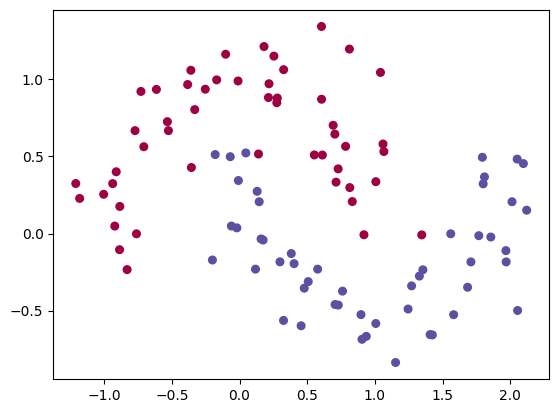

In [ ]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = datasets.make_moons(100, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=30, c=y, cmap=plt.cm.Spectral)

First let's test Logistic Regression classifier as baseline estimator.
Find in [scikit-learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) the suitable package 'LogisticRegression'

In [ ]:
# Import LogisticRegression classifier from sklearn.linear_models
# <FILL_IN>
# Instantiate the LogisticRegression classifier using default parameters
# clf = <FILL_IN>
# Train the logistic regression classifier
# clf.fit(<FILL_IN>, <FILL_IN>)

In [ ]:
# Estimate the Logit decision boundary function using the classifier predictions
# logit_decision_func = lambda x: clf.predict(x)
# Plot the decision boundary using the plot_decision_boundary function defined in in the second cell above
# <FILL_IN>
# plt.title("Logistic Regression")

## 2. Two-layers Neural Networks: build from scratch
Implementing a network from scratch at least once is an extremely valuable exercise. It helps you gain an understanding of how neural networks work, and that is essential to designing effective models.

Design of our neural architecture:
* 2-layers neural network: 1-input layer, 1-hidden layer, and 1-output layer.
* Nombre of nodes: 2(=dim of data) nodes for input layer, 2(=nombre of classes) nodes for output (can use only 1 output node predicting 0 or 1, but having 2 makes it easier to extend the network to more classes later)
* Free to choose the number of nodes of the hidden layer. More nodes into the hidden layer decribs more complex functions to fit data. But more computations and risk of overfitting. Good choice of the size of hidden layer always depends on your specific problem.
* Pick an activation function for our hidden layer. Nonlinear activation function is what allows us to fit nonlinear hypotheses. Common chocies for activation functions are tanh, the sigmoid function, or ReLUs. tanh performs quite well in many scenarios and has nice derivative property: $\tanh x$ is $1-\tanh^2 x$
* Pick activation function for the output to to output probabilities. softmax converts raw scores to probabilities

In [ ]:
# Architecture of the neural network, written as a list: [input_size, hidden_layer1_size, hidden_layer2_size, output_size]
n = [2, 3, 3, 1]
# Example: dataset with 5 features instead of 2 : n = [5, 3, 3, 1]
# Deeper network with three hidden layers n = [2, 8, 8, 4, 1]  # input=2, hidden1=8, hidden2=8, hidden3=4, output=1


# Helpful prints so you can quickly verify the layer sizes you intended.(This is great for debugging shape mismatches later.)
# Number of input features per sample (e.g., x1, x2)
print("layer 0 / input layer size", n[0])
print("layer 1 size", n[1])                # Neurons in hidden layer 1
print("layer 2 size", n[2])                # # Neurons in hidden layer 2
print("layer 3 size", n[3])                # Number of outputs (e.g., 1 for binary classification)

layer 0 / input layer size 2
layer 1 size 3
layer 2 size 3
layer 3 size 1


In [ ]:
n = [2, 3, 3, 1]
print("layer 0 / input layer size", n[0])
print("layer 1 size", n[1])
print("layer 2 size", n[2])
print("layer 3 size", n[3])

layer 0 / input layer size 2
layer 1 size 3
layer 2 size 3
layer 3 size 1


## Randomly initialize the biases and weights.

In [ ]:
# Weight matrices (connect one layer to the next)
W1 = <FILL_IN>  # Shape should be (n[1], n[0]) -> connects Input Layer to Hidden Layer 1
W2 = <FILL_IN>  # Shape should be (n[2], n[1]) -> connects Hidden Layer 1 to Hidden Layer 2
W3 = <FILL_IN>  # Shape should be (n[3], n[2]) -> connects Hidden Layer 2 to Output Layer

# Bias vectors (one bias per neuron in each layer, except the input layer)
b1 = <FILL_IN>  # Shape should be (n[1], 1) -> for Hidden Layer 1
b2 = <FILL_IN>  # Shape should be (n[2], 1) -> for Hidden Layer 2
b3 = <FILL_IN>  # Shape should be (n[3], 1) -> for Output Layer

In [ ]:
print("Weights for layer 1 shape:", W1.shape)
print("Weights for layer 2 shape:", W2.shape)
print("Weights for layer 3 shape:", W3.shape)
print("bias for layer 1 shape:", b1.shape)
print("bias for layer 2 shape:", b2.shape)
print("bias for layer 3 shape:", b3.shape)

Weights for layer 1 shape: (3, 2)
Weights for layer 2 shape: (3, 3)
Weights for layer 3 shape: (1, 3)
bias for layer 1 shape: (3, 1)
bias for layer 2 shape: (3, 1)
bias for layer 3 shape: (1, 1)


In [ ]:
W1

array([[ 1.00924453,  0.71338957],
       [-0.72805772,  0.83951646],
       [ 1.23902098, -1.78480389]])

In [ ]:
X.shape

(100, 2)

In [ ]:
# Activation Functions

# SIGMOID FUNCTION
# Equation: sigmoid(z) = 1 / (1 + e^(-z))
#
# What it does:
# - Takes any real number and "squashes" it to a range between 0 and 1.
# - Often used for probabilities, e.g., predicting if something belongs to Class 0 or 1.
#
# Example:
# - If z = 0, sigmoid(0) = 0.5
# - If z is a large positive number, sigmoid(z) approaches 1.
# - If z is a large negative number, sigmoid(z) approaches 0.
#
# Where it's used:
# - Typically in the OUTPUT layer for binary classification.
#
# Why it matters:
# - It gives a nice probabilistic interpretation but can suffer from
#   "vanishing gradients" for very large or very small z values.
#
# YOUR TASK: Replace <FILL_IN> with the correct formula.
def sigmoid(z):
    return <FILL_IN>

# RELU FUNCTION (Rectified Linear Unit)
# Equation: ReLU(z) = max(0, z)
#
# What it does:
# - If the input is negative, it outputs 0.
# - If the input is positive, it outputs the input value itself.
#
# Example:
# - If z = -3, ReLU(z) = 0
# - If z = 5, ReLU(z) = 5
#
# Where it's used:
# - Most common activation for HIDDEN layers in modern neural networks.
#
# Why it matters:
# - Helps avoid the vanishing gradient problem seen with sigmoid/tanh.
# - Very efficient to compute.
#
# YOUR TASK: Replace <FILL_IN> with the correct formula.
def relu(z):
    return <FILL_IN>


# DERIVATIVE OF SIGMOID (for Backpropagation)
# Why we need it:
# - During backpropagation, we need to know how sensitive the output is to changes
#   in the input so we can update the weights correctly.
#
# Derivation:
# - If a = sigmoid(z), then derivative sigmoid'(z) = a * (1 - a)
#
# Intuition:
# - When the sigmoid output is near 0 or 1, the derivative is small
#   -> this can slow down learning (vanishing gradient issue).
#
# YOUR TASK: Replace <FILL_IN> with the correct formula.
def dsigmoid_from_a(a):
    return <FILL_IN>

# DERIVATIVE OF RELU (for Backpropagation)
# Why we need it:
# - Similar to the sigmoid derivative, but simpler:
#   - If z > 0, derivative = 1
#   - If z <= 0, derivative = 0
#
# Intuition:
# - This tells us how much to adjust weights during learning.
#
# YOUR TASK: Replace <FILL_IN> with the correct formula.
def drelu_from_z(z):
    return <FILL_IN>



# Choose the hidden-layer activation: 'sigmoid' or 'relu'
HIDDEN_ACTIVATION = 'relu'   # <-- change to 'sigmoid' if you want

def _act(z):
    return relu(z) if HIDDEN_ACTIVATION=='relu' else sigmoid(z)

def _dact(z=None, a=None):
    # ReLU needs z; Sigmoid can use a
    if HIDDEN_ACTIVATION=='relu':
        return drelu_from_z(z)
    else:
        return dsigmoid_from_a(a)


# Forward Propagation

Forward propagation is how information flows through a neural network **from inputs to outputs**.



## Steps in Forward Propagation

### 1. **Linear Transformation**

$$
Z^{[l]} = W^{[l]} \cdot A^{[l-1]} + b^{[l]}
$$

Where:
- **W[l]**: Weight matrix for layer `l`  
- **A[l-1]**: Activations from the previous layer (or input data for the first layer)  
- **b[l]**: Bias vector for layer `l`



### 2. **Non-linear Activation Function**

$$
A^{[l]} = g(Z^{[l]})
$$

- Adds non-linearity so the network can learn complex patterns.
- Common activation choices:
  - **ReLU** for hidden layers
  - **Sigmoid** for the output layer in binary classification



### 3. **Final Output Layer**

Produces probabilities or final predictions.

For binary classification:
$$
A^{[output]} = \sigma(Z^{[output]})
$$

Where **σ** represents the sigmoid activation function.



## Example of Data Shape

- **Input data**:  
  `X.shape = (100, 2)` → 100 samples, each with 2 features.
- **Why transpose?**  
  We **transpose** it to `(2, 100)` because **columns represent individual examples** in our math notation.



In [ ]:
# Forward Propagation
m = X.shape[0]
# layer 1 calculations
# our training data  X in the shape m x n i.e (100, 2), but we need to transpose it for our feed forward process.

# Forward Propagation with <FILL_IN> placeholders
# Students must complete each step by replacing <FILL_IN> with correct operations.

def feed_forward(A0):
    # ----- Layer 1: Input -> Hidden Layer 1 -----
    Z1 = <FILL_IN>

    # Activation step: apply chosen activation function
    A1 = <FILL_IN>  # Hint: use _act(Z1)


    # ----- Layer 2: Hidden Layer 1 -> Hidden Layer 2 -----
    Z2 = <FILL_IN>
    A2 = <FILL_IN>


    # ----- Layer 3: Hidden Layer 2 -> Output Layer -----
    # The output layer uses SIGMOID for binary classification
    Z3 = <FILL_IN>
    A3 = <FILL_IN>  # Hint: use sigmoid(Z3)


    # ----- Caching intermediate values -----
    # Store inputs and outputs of each layer for backpropagation
    cache = {
        "A0": <FILL_IN>,
        "A1": <FILL_IN>,
        "A2": <FILL_IN>,
        "Z1": <FILL_IN>,
        "Z2": <FILL_IN>,
        "Z3": <FILL_IN>
    }

    # Return the final output and all intermediate values
    return <FILL_IN>, <FILL_IN>  # Hint: return A3, cache


# Running Forward Propagation

Now that we have implemented our `feed_forward` function, let's **run the network on our input data**.



## Steps:

1. **Prepare Input Data (`A0`)**
   - Our input matrix `X` has shape `(m, n_features)`, where:
     - `m` = number of training examples
     - `n_features` = number of features per example
   - For matrix multiplication in our network, we **transpose** `X` so that:
     \[
     A^0 = X^T
     \]
     - Shape becomes `(n_features, m)` → each **column represents a single training example**.



2. **Get Predictions (`y_hat`)**
   - We call `feed_forward(A0)` to compute predictions through the network.
   - The output `y_hat` will have shape:
     \[
     (1, m)
     \]
     - Each column represents the **predicted probability** that the example belongs to class `1`.



3. **Cache Values**
   - The `cache` dictionary stores all intermediate values (`Z` and `A` for each layer).
   - This is **essential for backpropagation** when we update the weights later.


4. **Verify Output Shape**
   - Finally, we print `y_hat.shape` to confirm the output has the correct dimensions.
   - Expected shape:
     ```
     (1, number_of_examples)
     ```


In [ ]:
# Transpose the input data
A0 = <FILL_IN>  # Hint: Use X.T to transpose the input

# Run forward propagation
y_hat, cache = <FILL_IN>  # Hint: Call feed_forward(A0)

# Print shape of predictions
print(y_hat.shape)  # Should be (1, m) where m = number of examples

(1, 100)


In [ ]:
y_hat

array([[0.52452697, 0.22642656, 0.34344185, 0.52452697, 0.3270875 ,
        0.20608692, 0.4883985 , 0.32794953, 0.52452697, 0.22783184,
        0.52452697, 0.22813822, 0.28572161, 0.43362848, 0.47394113,
        0.52452697, 0.52452697, 0.52452697, 0.52452697, 0.36940368,
        0.52452697, 0.44138225, 0.43920003, 0.3407201 , 0.52452697,
        0.52452697, 0.42900878, 0.20909456, 0.23887884, 0.2780151 ,
        0.45403237, 0.31352797, 0.23242589, 0.404162  , 0.52452697,
        0.52452697, 0.52452697, 0.52452697, 0.52452697, 0.31888472,
        0.27222702, 0.40274805, 0.52452697, 0.52452697, 0.36121732,
        0.50693124, 0.52452697, 0.52452697, 0.52452697, 0.38649733,
        0.25465855, 0.52452697, 0.40101141, 0.52452697, 0.52452697,
        0.52452697, 0.51827679, 0.52452697, 0.52452697, 0.52452697,
        0.47748077, 0.52452697, 0.4678874 , 0.50610926, 0.33148178,
        0.28811398, 0.52452697, 0.26746244, 0.46764284, 0.22987597,
        0.52452697, 0.52452697, 0.52452697, 0.21

# Preparing the Labels (`y`)

Our neural network produces predictions from the last layer with the shape:

$$
A^{[L]} = (n^{[L]}, m)
$$

Where:

- $n^{[L]}$ is the number of neurons in the **output layer** (given by `n[3]` in our network definition).
- $m$ is the number of training examples.

For everything to work smoothly, our labels \( y \) must **match this shape exactly** so that:

$$
y.shape = A^{[L]}.shape
$$




In [ ]:
# According to our neural network, the last layer n^[L] = n^[3] = 1, so the training label data Y will have dimensions 1 x m.
m = X.shape[0]
y = y.reshape(n[3], m)
y.shape

# Step 1: Get the number of training examples
m = <FILL_IN>  # Hint: Use X.shape[0] to get number of rows in X

# Step 2: Reshape the labels to match the output layer
y = <FILL_IN>  # Hint: Use y.reshape(1, m)

# Step 3: Confirm the shape
print(y.shape)  # Expected: (1, m)

SyntaxError: invalid syntax (ipython-input-3241710679.py, line 7)

## Cost/Loss Function

# Binary Cross-Entropy Loss Function

The **loss function** measures how well our model's predictions match the actual labels.

For **binary classification**, we use the **Binary Cross-Entropy Loss** (also known as *Log Loss*).


## Formula

The formula for one training example is:

$$
L = - \big[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \big]
$$

Where:
- \( y \) = true label (0 or 1)
- \( \hat{y} \) = predicted probability from the network



## For Multiple Examples

For **m** training examples, we take the **average** loss across all samples:

$$
J = \frac{1}{m} \sum_{i=1}^{m} - \big[ y^{(i)} \cdot \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \cdot \log(1 - \hat{y}^{(i)}) \big]
$$

Where:
- \( i \) indexes each training example
- \( J \) is the **final cost** we minimize during training


# Why This Loss?

- If the true label $y = 1$, the first term $-y \cdot \log(\hat{y})$ penalizes wrong predictions.  
- If the true label $y = 0$, the second term $-(1 - y) \cdot \log(1 - \hat{y})$ penalizes wrong predictions.  
- This encourages the network to **output probabilities close to the correct class**.


# Expected Shapes

- $\hat{y}$ should have shape $(n[3], m)$ → same as the network output $A3$.  
- $y$ should also have shape $(n[3], m)$ → reshaped earlier to match $A3$.


In [ ]:

# Binary Cross-Entropy Loss Function
def cross_entropy(y_hat, y):
    """
    Parameters:
    y_hat: predicted probabilities, shape (n[3], m)
    y: true labels, shape (n[3], m)

    Returns:
    The average cross-entropy loss as a scalar.
    """

    # Step 1: Compute element-wise loss for each sample
    losses = <FILL_IN>


    # Step 2: Find the number of samples
    m = <FILL_IN>

    # Step 3: Compute the mean loss
    summed_losses = <FILL_IN>

    # Step 4: Return final scalar value (sum of losses)
    return <FILL_IN>



In [ ]:
cross_entropy(y_hat, y)

np.float64(0.886528247843137)

# Backpropagation: Computing Gradients

Backpropagation is the process of **calculating gradients** so we can update the network's weights and biases.

We work **backwards through the network**:
1. Start at the **output layer** and compute the gradient of the loss with respect to its inputs.
2. Pass this "error signal" back to previous layers using the chain rule.
3. Repeat until we reach the first hidden layer.



## Goal

We want to compute:

- $\frac{\partial C}{\partial W}$ → Gradient of the cost with respect to weights  
- $\frac{\partial C}{\partial b}$ → Gradient of the cost with respect to biases  
- $\frac{\partial C}{\partial A}$ → Gradient of the cost with respect to activations (for passing to the previous layer)

Where:
- $C$ is the loss (Binary Cross-Entropy in our case)
- $W$, $b$, and $A$ are layer parameters and activations



## Process

Each layer has **two main steps**:
1. **Compute** $\delta Z$:$$ \delta Z = \delta A \cdot g'(Z)$$

   - $g'(Z)$ is the derivative of the activation function.

2. Use $\delta Z$ to compute:
   - $\frac{\partial C}{\partial W} = \delta Z \cdot A^{[l-1]T}$
   - $\frac{\partial C}{\partial b} = \text{sum}(\delta Z)$
   - $\delta A = W^T \cdot \delta Z$



We’ll implement this **layer-by-layer**:
- `backprop_layer_3`: Output layer
- `backprop_layer_2`: Second hidden layer
- `backprop_layer_1`: First hidden layer


In [ ]:
# Backpropagation: Output Layer
def backprop_layer_3(y_hat, Y, m, A2, W3):
    """
    Compute gradients for the output layer.

    Parameters:
    - y_hat: predictions (output from forward propagation), shape (n[3], m)
    - Y: true labels, shape (n[3], m)
    - m: number of training examples
    - A2: activations from the previous layer
    - W3: weights of the output layer

    Returns:
    - dC_dW3: gradient w.r.t. W3
    - dC_db3: gradient w.r.t. b3
    - dC_dA2: gradient w.r.t. activations passed to previous layer
    """
    A3 = y_hat

    # Step 1: Compute dC/dZ3
    dC_dZ3 = <FILL_IN>  # Hint: (1/m) * (A3 - Y)

    # Step 2: Compute dC/dW3
    dC_dW3 = <FILL_IN>  # Hint: dC_dZ3 @ A2.T

    # Step 3: Compute dC/db3
    dC_db3 = <FILL_IN>  # Hint: sum along axis=1, keepdims=True

    # Step 4: Compute dC/dA2 to pass backward
    dC_dA2 = <FILL_IN>  # Hint: W3.T @ dC_dZ3

    return dC_dW3, dC_db3, dC_dA2

In [ ]:
# Backpropagation: Hidden Layer 2
def backprop_layer_2(propagator_dC_dA2, A1, A2, W2, Z2):
    """
    Compute gradients for the second hidden layer.

    Parameters:
    - propagator_dC_dA2: gradient passed from next layer
    - A1: activations from layer 1
    - A2: activations from layer 2
    - W2: weights of layer 2
    - Z2: linear output of layer 2

    Returns:
    - dC_dW2, dC_db2, dC_dA1
    """
    # Step 1: Compute derivative of activation
    if HIDDEN_ACTIVATION == 'relu':
        dA2_dZ2 = <FILL_IN>  # Hint: _dact(z=Z2)
    else:
        dA2_dZ2 = <FILL_IN>  # Hint: _dact(a=A2)

    # Step 2: Compute dC/dZ2
    dC_dZ2 = <FILL_IN>  # Hint: propagator_dC_dA2 * dA2_dZ2

    # Step 3: Compute dC/dW2
    dC_dW2 = <FILL_IN>  # Hint: dC_dZ2 @ A1.T

    # Step 4: Compute dC/db2
    dC_db2 = <FILL_IN>  # Hint: sum along axis=1, keepdims=True

    # Step 5: Compute dC/dA1 for next layer backward
    dC_dA1 = <FILL_IN>  # Hint: W2.T @ dC_dZ2

    return dC_dW2, dC_db2, dC_dA1

# Hidden Layer Backpropagation

For each hidden layer, we follow these steps:


### **1. Activation Derivative**

- **For ReLU:**

  $$
  g'(Z) =
  \begin{cases}
  1 & \text{if } Z > 0 \\
  0 & \text{otherwise}
  \end{cases}
  $$

- **For Sigmoid:**

  $$
  g'(Z) = A \cdot (1 - A)
  $$



### **2. Compute $\delta Z$**

$$
\delta Z = \delta A \cdot g'(Z)
$$



### **3. Weight Gradient**

$$
\frac{\partial C}{\partial W} = \delta Z \cdot A_{\text{prev}}^T
$$

Where $A_{\text{prev}}$ is the activation output from the previous layer.


### **4. Bias Gradient**

$$
\frac{\partial C}{\partial b} = \sum \delta Z
$$

Sum across all training examples to get the gradient for each bias unit.


### **5. Propagate Backward**

$$
\delta A_{\text{prev}} = W^T \cdot \delta Z
$$

This value is passed to the previous layer to continue backpropagation.


In [ ]:
# Backpropagation: Hidden Layer 1
def backprop_layer_1(propagator_dC_dA1, A1, A0, W1, Z1):
    """
    Compute gradients for the first hidden layer.
    """
    # Step 1: Compute activation derivative
    if HIDDEN_ACTIVATION == 'relu':
        dA1_dZ1 = <FILL_IN>  # Hint: _dact(z=Z1)
    else:
        dA1_dZ1 = <FILL_IN>  # Hint: _dact(a=A1)

    # Step 2: Compute dC/dZ1
    dC_dZ1 = <FILL_IN>  # Hint: propagator_dC_dA1 * dA1_dZ1

    # Step 3: Compute dC/dW1
    dC_dW1 = <FILL_IN>  # Hint: dC_dZ1 @ A0.T

    # Step 4: Compute dC/db1
    dC_db1 = <FILL_IN>  # Hint: sum along axis=1, keepdims=True

    return dC_dW1, dC_db1

# Training the Neural Network

The `train()` function brings together all the steps to optimize the neural network:


## **Steps in Training**

1. **Forward Propagation**
   - Compute predictions using the current weights and biases.
   - This gives us the network's outputs, $\hat{Y}$.


2. **Loss Calculation**
   - Measure how far predictions are from actual labels using **binary cross-entropy loss**:
     $$
     C = -\frac{1}{m} \sum \Big[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \Big]
     $$


3. **Backpropagation**
   - Pass the error signal backward through the network.
   - Compute the **gradients** for each:
     - $\frac{\partial C}{\partial W_3}, \quad \frac{\partial C}{\partial b_3}$
     - $\frac{\partial C}{\partial W_2}, \quad \frac{\partial C}{\partial b_2}$
     - $\frac{\partial C}{\partial W_1}, \quad \frac{\partial C}{\partial b_1}$


4. **Parameter Update (Gradient Descent)**
   - Update each parameter using the gradients:
     $$
     W = W - \alpha \cdot \frac{\partial C}{\partial W}
     $$
     $$
     b = b - \alpha \cdot \frac{\partial C}{\partial b}
     $$
   - Where:
     - \( \alpha \) = learning rate
     - \( W, b \) = current weights and biases


5. **Monitor Progress**
   - Print the cost every few epochs to check if learning is happening.
   - A **decreasing cost** means the network is improving.


In [ ]:
def train():
    # Step 0: Access global variables for weights and biases
    global W3, W2, W1, b3, b2, b1

      # Step 1: Prepare A0 (input layer activation)
    A0 = <FILL_IN>  # Hint: X.T to transpose the input data

    # Step 1: Set hyperparameters
    epochs = <FILL_IN>  # Hint: number of iterations, e.g., 1000
    alpha = <FILL_IN>   # Hint: learning rate, e.g., 0.1
    costs = []

    for e in range(epochs):
        # 1) FORWARD PROPAGATION
        y_hat, cache = <FILL_IN>  # Hint: call the feed_forward function

        # 2) LOSS CALCULATION
        error = <FILL_IN>  # Hint: call the cross_entropy function
        costs.append(error)

        # 3) BACKPROPAGATION
        # Compute gradients for output layer
        dC_dW3, dC_db3, dC_dA2 = <FILL_IN>
        # Hint: all the function backprop_layer_3

        # Compute gradients for second hidden layer
        dC_dW2, dC_db2, dC_dA1 = <FILL_IN>
        # Hint: all the function backprop_layer_2

        # Compute gradients for first hidden layer
        dC_dW1, dC_db1 = <FILL_IN>
        # Hint: call the function backprop_layer_1

        # 4) UPDATE PARAMETERS
        # Update output layer
        W3 = <FILL_IN>
        b3 = <FILL_IN>

        # Update second hidden layer
        W2 = <FILL_IN>
        b2 = <FILL_IN>

        # Update first hidden layer
        W1 = <FILL_IN>
        b1 = <FILL_IN>

        # 5) MONITOR PROGRESS
        if e % 20 == 0:
            print(f"epoch {e}: cost = {error:.6f}")

    return costs


In [ ]:
costs = train()

epoch 0: cost = 0.886528
epoch 20: cost = 0.701665
epoch 40: cost = 0.694263
epoch 60: cost = 0.692812
epoch 80: cost = 0.688064
epoch 100: cost = 0.645783
epoch 120: cost = 0.569613
epoch 140: cost = 0.515212
epoch 160: cost = 0.473365
epoch 180: cost = 0.443003
epoch 200: cost = 0.418128
epoch 220: cost = 0.393193
epoch 240: cost = 0.367560
epoch 260: cost = 0.349445
epoch 280: cost = 0.338601
epoch 300: cost = 0.331036
epoch 320: cost = 0.325828
epoch 340: cost = 0.321866
epoch 360: cost = 0.318803
epoch 380: cost = 0.316406
epoch 400: cost = 0.313790
epoch 420: cost = 0.311823
epoch 440: cost = 0.310278
epoch 460: cost = 0.309071
epoch 480: cost = 0.308080
epoch 500: cost = 0.307237
epoch 520: cost = 0.306509
epoch 540: cost = 0.305874
epoch 560: cost = 0.305317
epoch 580: cost = 0.304822
epoch 600: cost = 0.304381
epoch 620: cost = 0.303984
epoch 640: cost = 0.303625
epoch 660: cost = 0.303297
epoch 680: cost = 0.302998
epoch 700: cost = 0.302722
epoch 720: cost = 0.302466
epoch 7

# Helper Functions for Visualising Results

In [ ]:


# Predictions & metrics
def predict_proba(X_2d):
    """X_2d: (m,2) -> returns (m,1) probabilities"""
    A0 = X_2d.T                       # (2,m)
    y_hat, _ = feed_forward(A0)       # (1,m)
    return y_hat.T                    # (m,1)

def predict_classes(X_2d, threshold=0.5):
    p = predict_proba(X_2d)
    return (p >= threshold).astype(int)

def binary_metrics(y_true_rowvec, y_pred_rowvec):
    """
    y_true_rowvec, y_pred_rowvec: shape (1, m) of 0/1
    returns accuracy, precision, recall
    """
    y_true = y_true_rowvec.reshape(-1)
    y_pred = y_pred_rowvec.reshape(-1)
    TP = np.sum((y_true==1) & (y_pred==1))
    TN = np.sum((y_true==0) & (y_pred==0))
    FP = np.sum((y_true==0) & (y_pred==1))
    FN = np.sum((y_true==1) & (y_pred==0))
    acc = (TP + TN) / max(1, (TP + TN + FP + FN))
    prec = TP / max(1, (TP + FP))
    rec = TP / max(1, (TP + FN))
    return acc, prec, rec

# ----- Plots -----
def plot_loss(costs):
    plt.figure()
    plt.plot(range(len(costs)), costs)
    plt.xlabel("Epoch")
    plt.ylabel("Loss (Binary Cross-Entropy)")
    plt.title("Training Loss Curve")
    plt.show()

def plot_decision_boundary(X_2d, y_rowvec, padding=0.5, h=0.02, threshold=0.5):
    """
    Visualize decision boundary for 2D input.
    X_2d: (m,2), y_rowvec: (1,m)
    """
    x_min, x_max = X_2d[:,0].min()-padding, X_2d[:,0].max()+padding
    y_min, y_max = X_2d[:,1].min()-padding, X_2d[:,1].max()+padding
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]     # (N,2)
    Z = predict_proba(grid)                  # (N,1)
    Z = (Z >= threshold).astype(int).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4, levels=[-0.5,0.5,1.5])
    y_flat = y_rowvec.reshape(-1)
    plt.scatter(X_2d[:,0], X_2d[:,1], c=y_flat, edgecolor='k')
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.title("Decision Boundary")
    plt.show()



def plot_confusion_matrix(y_true, y_pred):
    """
    Computes and plots the confusion matrix for binary classification.

    Parameters:
    - y_true: Actual labels, shape (1, m)
    - y_pred: Predicted probabilities, shape (1, m)

    Returns:
    - cm: The computed confusion matrix as a 2D numpy array
    """
    # Step 1: Convert predicted probabilities to class labels (0 or 1)
    y_pred_classes = (y_pred > 0.5).astype(int)

    # Step 2: Flatten the arrays to match sklearn's input format
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred_classes.flatten()

    # Step 3: Compute confusion matrix
    cm = confusion_matrix(y_true_flat, y_pred_flat)

    # Step 4: Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    # Define labels
    classes = ['Negative (0)', 'Positive (1)']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # Step 5: Annotate each cell with the count
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    # Add axis labels
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    return cm

## plot loss, compute metrics, and visualize boundary

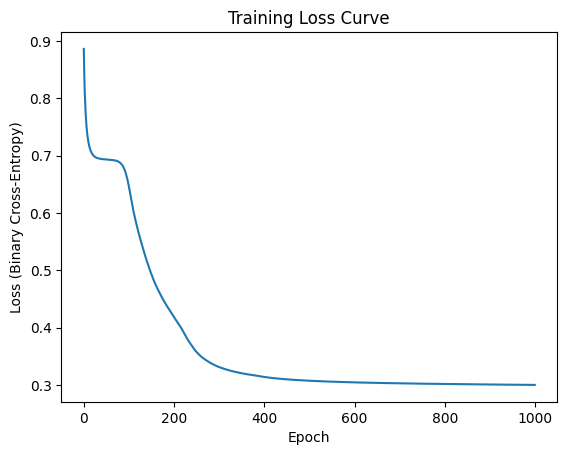

Accuracy: 0.8900  Precision: 0.9149  Recall: 0.8600


In [ ]:
# Loss curve
plot_loss(costs)

# Predictions & metrics
y_prob = feed_forward(A0)[0]             # (1,m)
y_pred = (y_prob >= 0.5).astype(int)     # (1,m)
acc, prec, rec = binary_metrics(y, y_pred)
print(f"Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}")

In [ ]:
# Plot confusion matrix
cm = plot_confusion_matrix(y, y_hat)
print("Confusion Matrix:\n", cm)

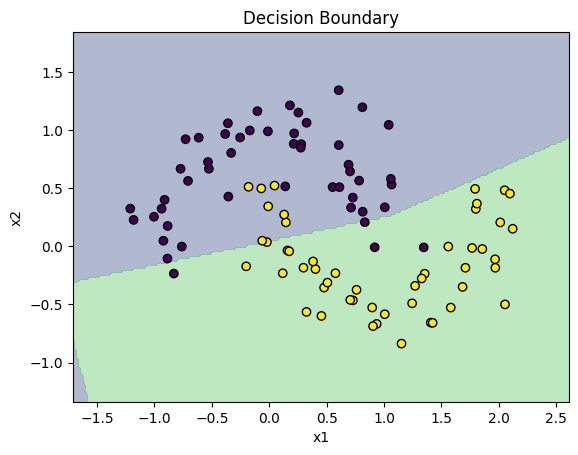

In [ ]:
# Decision boundary (for 2D input)
plot_decision_boundary(X, y, threshold=0.5)